In [26]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
#WARNING LIBRARYS
import warnings
warnings.filterwarnings("ignore")
#SKLEARN LIBRARYS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:\\files\\Fileee\\Fake news classifier\\train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

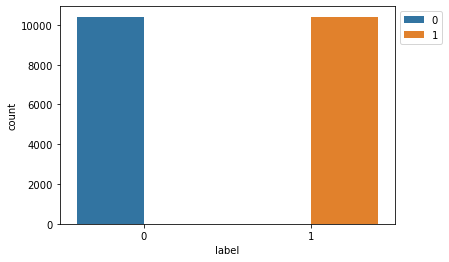

In [6]:
sns.countplot(df['label'],hue='label',data=df)
plt.legend(bbox_to_anchor = (1,1))

In [7]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [8]:
df = df[['id','title','label']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 487.6+ KB


In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20242 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 632.6+ KB


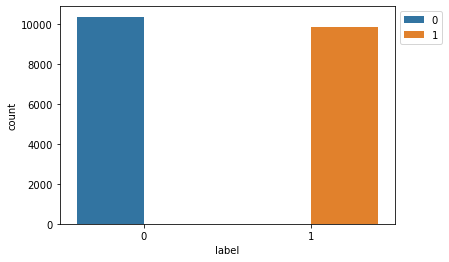

In [12]:
sns.countplot(df['label'],hue='label',data=df)
plt.legend(bbox_to_anchor = (1,1))

In [13]:
# X = title
# y = label

In [14]:
df.head()

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


In [15]:
stemmer = PorterStemmer()
lemmitizer = WordNetLemmatizer()
stop_word = set(stopwords.words('english'))
df.reset_index(inplace = True)

In [16]:
corpus = []
for i in range(len(df)):
    #Remove all character except A-Z and a-z
    sent = re.sub('[^a-zA-Z]',' ',df['title'][i])
    
    #Convert into lower case
    sent = sent.lower()
    
    #Steamming
    sent = " ".join([stemmer.stem(word) for word in str(sent).split()])
    
    #Remove stopwords
    sent = " ".join([stemmer.stem(word) for word in str(sent).split()
                    if(word not in stop_word)])
    
    corpus.append(sent)
#corpus

In [19]:
# Stem + BOW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()
#Output
y = df['label']

In [20]:
temp_df = pd.DataFrame(X,columns=cv.get_feature_names())
temp_df

,aaron,ab,abandon,abba,abc,abduct,abe,abedin,abl,aboard,...,yr,zealand,zen,zero,zika,zionist,zone,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create ML Model

In [23]:
#Split data into training and testing from
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

In [24]:
print("X_train:- ",X_train.shape)
print("X_test:- ",X_test.shape)
print("y_train:- ",y_train.shape)
print("y_test:- ",X_test.shape)

X_train:-  (16193, 5000)
X_test:-  (4049, 5000)
y_train:-  (16193,)
y_test:-  (4049, 5000)


In [28]:
# Model_Eval func
from sklearn.metrics import precision_score,recall_score,f1_score

def model_eval(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy is:- ", acc)
    print("Error is:- ", 1-acc)
    print("precision:- ",precision_score(y_test,y_pred,average="weighted"))
    print("Recall:- ",recall_score(y_test,y_pred,average="weighted"))
    print("F1 score:- ",f1_score(y_test,y_pred,average="weighted"))
    
    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    
    sns.heatmap(cm,annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")

# KNN Model

Model created
Model trained completed
Y predict completed
Acc for k = 2: - 82.95875524820944
Accuracy is:-  0.8295875524820944
Error is:-  0.17041244751790563
precision:-  0.867498125613057
Recall:-  0.8295875524820944
F1 score:-  0.8263002225952437


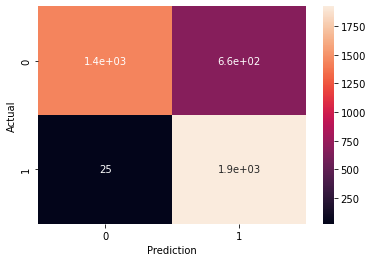

In [32]:
#KNN
ML_Model_1 = KNeighborsClassifier(n_neighbors=2)
print("Model created")

# Model training
ML_Model_1.fit(X_train,y_train)
print("Model trained completed")

# find the y pred
y_pred = ML_Model_1.predict(X_test)
print("Y predict completed")

#find acc
acc = accuracy_score(y_test,y_pred)
print("Acc for k = 2: -", acc*100)
model_eval(y_test,y_pred)

# NB Model

Model train
Model prepare
accuracy for GNB is:-  77.30303778710793
Accuracy is:-  0.7730303778710793
Error is:-  0.2269696221289207
precision:-  0.7751432373465966
Recall:-  0.7730303778710793
F1 score:-  0.7730386291043393


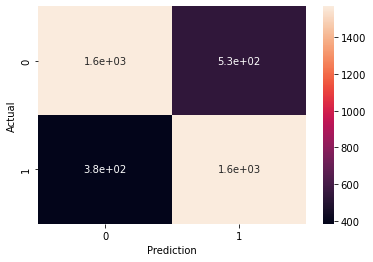

In [33]:
#Create a model for NB
from sklearn.naive_bayes import GaussianNB

#Create model
ML_Model = GaussianNB()

#Train model
ML_Model.fit(X_train,y_train)
print("Model train")

#Prepare model
y_pred = ML_Model.predict(X_test)
print("Model prepare")

#Find accuracy
acc = accuracy_score(y_test,y_pred)
print("accuracy for GNB is:- ",acc*100)
model_eval(y_test,y_pred)

# Logistic Model

Model train
Model prepare
accuracy is:-  93.20819955544579
Accuracy is:-  0.9320819955544579
Error is:-  0.06791800444554208
precision:-  0.9348153558841462
Recall:-  0.9320819955544579
F1 score:-  0.9320807112997593


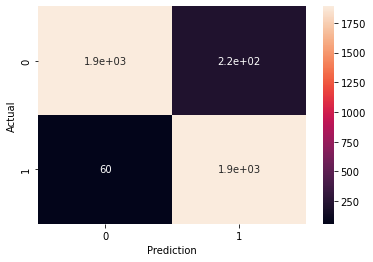

In [38]:
#Import KNN and accuracy_score from sklearn.
from sklearn.linear_model import LogisticRegression

#Create model
ML_Model_2 = LogisticRegression()

#Train model
ML_Model_2.fit(X_train,y_train)
print("Model train")

#Prepare model
y_pred = ML_Model_2.predict(X_test)
print("Model prepare")

#Find accuracy
acc = accuracy_score(y_test,y_pred)
print("accuracy is:- ",acc*100)
model_eval(y_test,y_pred)

# SVM Model

Model train
Model prepare
accuracy is:-  93.10940973079774
Accuracy is:-  0.9310940973079773
Error is:-  0.06890590269202268
precision:-  0.9322086117052211
Recall:-  0.9310940973079773
F1 score:-  0.9311169324499521


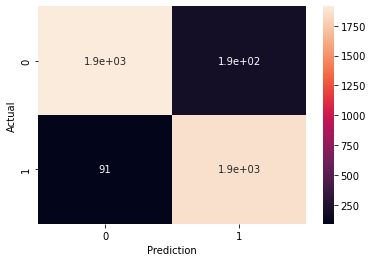

In [37]:
#Create SVM model......
from sklearn.svm import SVC
#Create model
ML_Model = SVC(kernel='linear')

#Train model
ML_Model.fit(X_train,y_train)
print("Model train")

#Prepare model
y_pred = ML_Model.predict(X_test)
print("Model prepare")

#Find accuracy
acc = ML_Model.score(X_test,y_test)
print("accuracy is:- ",acc*100)
model_eval(y_test,y_pred)

In [39]:
import joblib
joblib.dump(ML_Model_2,"Fake_news_model.pkl")
joblib.dump(cv,"cv_model.pkl")
print("Model Saved")

Model Saved
